## 缺失值处理
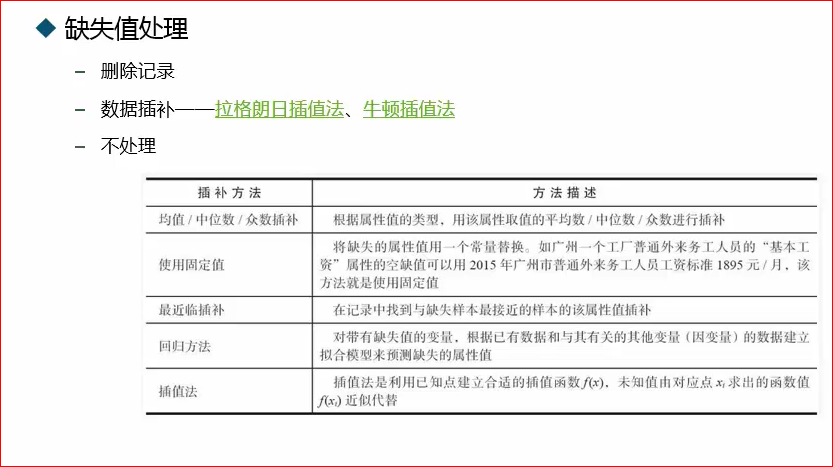

### 剔除缺失值所在的行和列
- 我们已经知道，Pandas基本上把None和NaN看成是可以等价交换的缺失值形式。为了完成这种交换过程，Pandas提供了一些方法来发现、剔除、替换数据结构中的缺失值，主要包括以下几种。

- 默认情况下，dropna()会剔除任何包含缺失值的整行数据
- isnull()创建一个布尔类型的掩码标签缺失值。
- notnull() 与isnull()操作相反
- dropna()返回一个剔除缺失值的数据
- fill()返回一个填充了缺失值的数据副本

## 填充缺失值


In [2]:
# 发现缺失值

# Pandas数据结构有两种有效的方法可以发现缺失值：isnull()和notnull()。每种方法都返回布尔类型的掩码数据

import pandas as pd
import numpy as np
data=pd.Series([1,np.nan,"hello",None])
data.isnull()
# 返回布尔类型的值

0    False
1     True
2    False
3     True
dtype: bool

In [3]:
# 布尔类型的掩码数据可以直接作为Series或Dataframe的索引使用

data[data.notnull()]

# Series里使用的isNull()和notnull()同样使用与DataFrame,产生的结果同样是布尔类型


0        1
2    hello
dtype: object

## 剔除缺失值


In [4]:
# 剔除缺失值
# 除了前面介绍的掩码方法，还有两种很好用的缺失值处理方法，分别是dropna()（剔除缺失值）和fillna()（填充缺失值）

data.dropna()

0        1
2    hello
dtype: object

In [6]:
# 而在DataFrame上使用它们时需要设置一些参数，例如下面的DataFrame：

import numpy as np
import pandas as pd
#np.random.randint(1,10,size=(3,3))

df = pd.DataFrame([[7, np.nan, 9],
       [1, 7, 9],
       [np.nan, 8, 6]])
df

,0,1,2
0,7.0,NaN,9
1,1.0,7.0,9
2,NaN,8.0,6


In [7]:
# 剔除含有缺失值的行
df.dropna()

,0,1,2
1,1.0,7.0,9


In [9]:
# 剔除含有缺失值的整列
df.dropna(axis=1)

,2
0,9
1,9
2,6


In [10]:
# 只有一行全部是缺失值才会剔除

df[3]=np.nan
df

,0,1,2,3
0,7.0,NaN,9,NaN
1,1.0,7.0,9,NaN
2,NaN,8.0,6,NaN


In [13]:
df.dropna(axis=1,how="all")

,0,1,2
0,7.0,NaN,9
1,1.0,7.0,9
2,NaN,8.0,6


In [14]:
# 还可以通过thresh参数设置行或列中非缺失值的最小数量，从而实现更加个性化的配置：

df.dropna(axis=0,thresh=3)

,0,1,2,3
1,1.0,7.0,9,NaN


## 填充缺失值

- 有时候你可能并不想移除缺失值，而是想把它们替换成有效的数值。有效的值可能是像0、1、2那样单独的值，也可能是经过填充（imputation）或转换（interpolation）得到的。虽然你可以通过isnull()方法建立掩码来填充缺失值，但是Pandas为此专门提供了一个fillna()方法，它将返回填充了缺失值后的数组副本。

In [15]:
import pandas as pd
import numpy as np
data = pd.Series([1,np.nan,2,None,3],index=list('abcde'))
data

a    1.0
b    NaN
c    2.0
d    NaN
e    3.0
dtype: float64

In [16]:
# 用一个单独的值来填充缺失值
data.fillna(0)

a    1.0
b    0.0
c    2.0
d    0.0
e    3.0
dtype: float64

In [17]:
# 可以用缺失值前面的有效值来从前往后填充（forward-fill）
data.fillna(method="ffill")


a    1.0
b    1.0
c    2.0
d    2.0
e    3.0
dtype: float64

In [19]:
# 也可以用缺失值后面的有效值来从后往前填充（back-fill）
data.fillna(method="bfill")

a    1.0
b    2.0
c    2.0
d    3.0
e    3.0
dtype: float64

In [20]:
# DataFrame的操作方法与Series类似，只是在填充时需要设置坐标轴参数
import numpy as np
import pandas as pd
#np.random.randint(1,10,size=(3,3))

df = pd.DataFrame([[7, np.nan, 9],
       [1, 7, 9],
       [np.nan, 8, 6]])
df

,0,1,2
0,7.0,NaN,9
1,1.0,7.0,9
2,NaN,8.0,6


In [21]:
df.fillna(method="ffill",axis=1)

,0,1,2
0,7.0,7.0,9.0
1,1.0,7.0,9.0
2,NaN,8.0,6.0


## 层级索引

- 当目前为止，我们接触的都是一维数据和二维数据，用Pandas的Series和DataFrame对象就可以存储。但我们也经常会遇到存储多维数据的需求，数据索引超过一两个键。因此，Pandas提供了Panel和Panel4D对象解决三维数据与四维数据（详情请参见3.7节）。而在实践中，更直观的形式是通过层级索引（hierarchical indexing，也被称为多级索引，multi-indexing）配合多个有不同等级（level）的一级索引一起使用，这样就可以将高维数组转换成类似一维Series和二维DataFrame对象的形式。

In [29]:
# 创建Multilndex对象的方法。
import pandas as pd
import numpy as np
index = [('California', 2000), ('California', 2010),
                ('New York', 2000), ('New York', 2010),
                ('Texas', 2000), ('Texas', 2010)]
populations = [33871648, 37253956,
                      18976457, 19378102,
                      20851820, 25145561]
pop=pd.Series(populations,index=index)
pop

(California, 2000)    33871648
(California, 2010)    37253956
(New York, 2000)      18976457
(New York, 2010)      19378102
(Texas, 2000)         20851820
(Texas, 2010)         25145561
dtype: int64

In [31]:
# 通过元组构成的多级索引，你可以直接在Series上取值或用切片查询数据：
pop[("California",2010):("Texas",2000)]


(California, 2010)    37253956
(New York, 2000)      18976457
(New York, 2010)      19378102
(Texas, 2000)         20851820
dtype: int64

In [33]:
# 如果要选择2010年的数据，那么就得用一些比较复杂的清理方法了

pop[[i for i in index if i[1] == 2010]]
# 这么做虽然也能得到需要的结果，但是与Pandas令人爱不释手的切片语法相比，这种方法确实不够简洁（在处理较大的数据时也不够高效）。


(California, 2010)    37253956
(New York, 2010)      19378102
(Texas, 2010)         25145561
dtype: int64

In [28]:
import pandas as pd
import numpy as np
index = [('California', 2000), ('California', 2010),
                ('New York', 2000), ('New York', 2010),
                ('Texas', 2000), ('Texas', 2010)]
populations = [33871648, 37253956,
                      18976457, 19378102,
                      20851820, 25145561]
populations=np.array(populations).reshape(3,2)
data = pd.DataFrame(index=["California","New York","Texas"],columns=[2000,2010],data=populations)
data

,2000,2010
California,33871648,37253956
New York,18976457,19378102
Texas,20851820,25145561


In [39]:
## 2. 好办法：Pandas多级索引
## 用元组表示索引其实是多级索引的基础，Pandas的MultiIndex类型提供了更丰富的操作方法。我们可以用元组创建一个多级索引，如下所示：
index = pd.MultiIndex.from_tuples(index)
index
print(index)

MultiIndex(levels=[['California', 'New York', 'Texas'], [2000, 2010]],
           labels=[[0, 0, 1, 1, 2, 2], [0, 1, 0, 1, 0, 1]])


In [40]:
## 如果将前面创建的pop的索引重置（reindex）为MultiIndex，就会看到层级索引：
pop=pop.reindex(index)
pop


California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [42]:
pop[:,2010]
# 结果是单索引的数组

California    37253956
New York      19378102
Texas         25145561
dtype: int64

In [43]:
#3. 高维数据的多级索引
# 你可能已经注意到，我们其实完全可以用一个带行列索引的简单DataFrame代替前面的多级索引。
# 其实Pandas已经实现了类似的功能。unstack()方法可以快速将一个多级索引的Series转化为普通索引的DataFrame
pop_df=pop.unstack()
pop_df

# 这才是我们想要的结果

,2000,2010
California,33871648,37253956
New York,18976457,19378102
Texas,20851820,25145561


In [44]:
# 用stack方法实现相反的效果
pop_df.stack()

California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [45]:
pop_df = pd.DataFrame({'total': pop,
                       'under18': [9267089, 9284094,
                                   4687374, 4318033,
                                   5906301, 6879014]})
pop_df

total  under18
California 2000  33871648  9267089
           2010  37253956  9284094
New York   2000  18976457  4687374
           2010  19378102  4318033
Texas      2000  20851820  5906301
           2010  25145561  6879014

In [48]:
# 所有在3.4节介绍过的通用函数和其他功能也同样适用于层级索引。我们可以计算上面数据中18岁以下的人口占总人口的比例

f_u18=pop_df["under18"] / pop_df["total"]
print(f_u18)
f_u18.unstack()

California  2000    0.273594
            2010    0.249211
New York    2000    0.247010
            2010    0.222831
Texas       2000    0.283251
            2010    0.273568
dtype: float64


,2000,2010
California,0.273594,0.249211
New York,0.247010,0.222831
Texas,0.283251,0.273568


### 多级索引的创建方法

- 为Series或DataFrame创建多级索引最直接的办法就是将index参数设置为至少二维的索引数组


In [61]:
import pandas as pd
import numpy as np
df=pd.DataFrame(np.random.rand(4,2),
               index=[["a","a","b","b"],[1,2,1,2]],
               columns=['data1','data1'])
df
# print(np.random.rand(4,2))
# print(np.random.randint(1,10,size=(3,3)))

data1     data1
a 1  0.048254  0.899994
  2  0.955953  0.336251
b 1  0.134343  0.027935
  2  0.397594  0.444390



- 同理，如果你把将元组作为键的字典传递给Pandas，Pandas也会默认转换为MultiIndex

In [62]:
data = {('California', 2000): 33871648,
                ('California', 2010): 37253956,
                ('Texas', 2000): 20851820,
                ('Texas', 2010): 25145561,
                ('New York', 2000): 18976457,
                ('New York', 2010): 19378102}
pd.Series(data)

California  2000    33871648
            2010    37253956
Texas       2000    20851820
            2010    25145561
New York    2000    18976457
            2010    19378102
dtype: int64

### 1.显式的创建多级索引

In [63]:
import pandas as pd
import numpy as np
pd.MultiIndex.from_arrays([['a', 'a', 'b', 'b'], [1, 2, 1, 2]])

MultiIndex(levels=[['a', 'b'], [1, 2]],
           labels=[[0, 0, 1, 1], [0, 1, 0, 1]])

In [64]:
# 也可以通过包含多个索引值的元组构成的列表创建MultiIndex：
pd.MultiIndex.from_tuples([('a', 1), ('a', 2), ('b', 1), ('b', 2)])


MultiIndex(levels=[['a', 'b'], [1, 2]],
           labels=[[0, 0, 1, 1], [0, 1, 0, 1]])

In [65]:
# 还可以用两个索引的笛卡尔积（Cartesian product）创建MultiIndex：
pd.MultiIndex.from_product([['a', 'b'], [1, 2]])


MultiIndex(levels=[['a', 'b'], [1, 2]],
           labels=[[0, 0, 1, 1], [0, 1, 0, 1]])

###  2. 多级索引的等级名称

In [67]:
import pandas as pd
import numpy as np

index = [('California', 2000), ('California', 2010),
                ('New York', 2000), ('New York', 2010),
                ('Texas', 2000), ('Texas', 2010)]
populations = [33871648, 37253956,
                      18976457, 19378102,
                      20851820, 25145561]
populations=np.array(populations).reshape(3,2)
data = pd.DataFrame(index=["California","New York","Texas"],columns=[2000,2010],data=populations)
pop=pop.reindex(index)
pop.index.names = ['state', 'year']
pop

state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

## 多级列索引
- 每个DataFrame的行与列都是对称的，也就是说既然有多级行索引，那么同样可以有多级列索引

In [2]:
# 多级行列索引
import numpy as np
import pandas as pd
index = pd.MultiIndex.from_product([[2013, 2014], [1, 2]],
                                   names=['year', 'visit'])
columns = pd.MultiIndex.from_product([['Bob', 'Guido', 'Sue'], ['HR', 'Temp']],
                                     names=['subject', 'type'])
data=np.arange(24).reshape(4,6)
print(data)
data[:,::2] *= 10
print(data)
data += 37
print(data)

[[ 0  1  2  3  4  5]
 [ 6  7  8  9 10 11]
 [12 13 14 15 16 17]
 [18 19 20 21 22 23]]
[[  0   1  20   3  40   5]
 [ 60   7  80   9 100  11]
 [120  13 140  15 160  17]
 [180  19 200  21 220  23]]
[[ 37  38  57  40  77  42]
 [ 97  44 117  46 137  48]
 [157  50 177  52 197  54]
 [217  56 237  58 257  60]]


In [81]:
data=np.arange(24).reshape(4,6)
print(data)
data[:,1::2]
print(data[1:3,2:4])
print(data[1::2,1::3])

[[ 0  1  2  3  4  5]
 [ 6  7  8  9 10 11]
 [12 13 14 15 16 17]
 [18 19 20 21 22 23]]
[[ 8  9]
 [14 15]]
[[ 7 10]
 [19 22]]


In [3]:
# 创建Dataframe
import pandas as pd
import numpy as np
health_data = pd.DataFrame(data, index=index, columns=columns)
health_data

subject     Bob      Guido       Sue     
type         HR Temp    HR Temp   HR Temp
year visit                               
2013 1       37   38    57   40   77   42
     2       97   44   117   46  137   48
2014 1      157   50   177   52  197   54
     2      217   56   237   58  257   60

In [4]:
# 多级行列索引的创建非常简单。上面创建了一个简易的四维数据，四个维度分别为被检查人的姓名、检查项目、检查年份和检查次数。
health_data["Guido"]

type         HR  Temp
year visit           
2013 1       57    40
     2      117    46
2014 1      177    52
     2      237    58